# <center>FLIGHT DELAY PREDICTIONS</center>

<center><img src="https://www.webintravel.com/wp-content/uploads/2020/05/den-belitsky-GettyImages-854673918-scaled.jpg" width="700"></center>

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Getting our Data

In [3]:
flights = pd.read_csv('data/flights.csv')
flights

/tmp/ipykernel_67891/2541854373.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('data/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights_needed_data = flights.sample(n=100000)  # getting a segment 

In [8]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
710587,2015,2,16,1,B6,1680,N640JB,FLL,DCA,2035,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
4776668,2015,10,25,7,AA,1381,N4XPAA,11298,11066,1820,...,2225.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
352139,2015,1,23,5,DL,1361,N929AT,ATL,CHA,2255,...,2331.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5088567,2015,11,14,6,UA,1179,N62884,LAS,IAH,1522,...,2001.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4290813,2015,9,24,4,AA,1714,N178US,PHL,ORD,2035,...,2144.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028098,2015,7,9,4,B6,1479,N267JB,DCA,FLL,1300,...,1518.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1254062,2015,3,22,7,MQ,2975,N682MQ,ORD,HSV,2020,...,2254.0,54.0,0,0,NaN,9.0,0.0,0.0,44.0,1.0
418605,2015,1,28,3,EV,5570,N181PQ,ATL,BTR,1350,...,1418.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5729559,2015,12,26,6,EV,5485,N927EV,ATL,AEX,939,...,1031.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights_needed_data.info()  # for an insight into the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 710587 to 1997974
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99768 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98546 non-null   float64
 11  DEPARTURE_DELAY      98546 non-null   float64
 12  TAXI_OUT             98494 non-null   float64
 13  WHEELS_OFF           98494 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIM

In [10]:
flights_needed_data.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted

DIVERTED
0    99736
1      264
dtype: int64

### Data Visualization

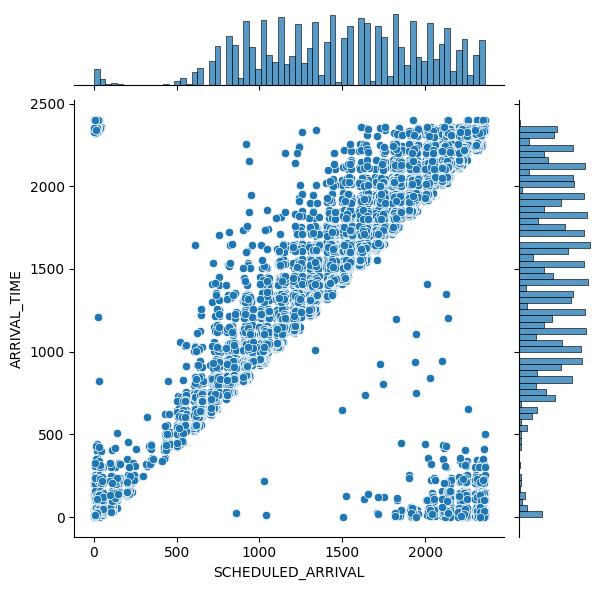

In [11]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [12]:
corr = flights_needed_data.corr(method='pearson')

/tmp/ipykernel_67891/1887864288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_needed_data.corr(method='pearson')


<AxesSubplot: >

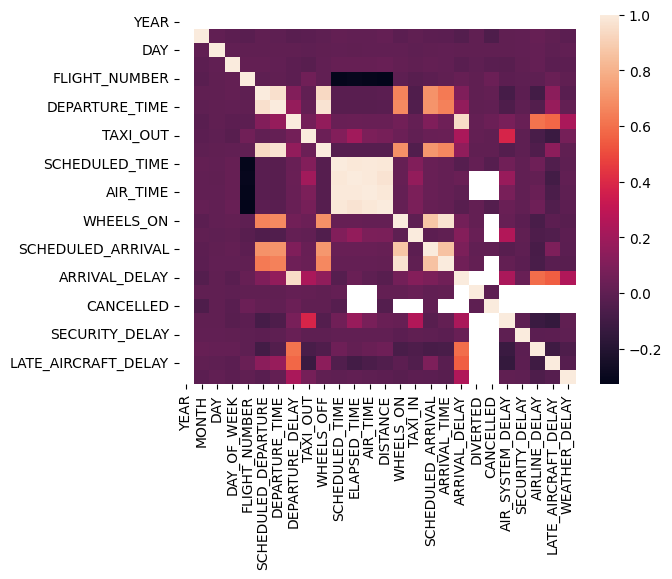

In [13]:
sb.heatmap(corr)

In [14]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008150,-0.009152,-0.018881,0.000041,-0.002073,-0.019856,-0.013348,-0.003199,...,-0.009617,-0.012759,-0.034973,0.003524,-0.058476,0.002626,0.006362,0.023762,-0.001352,-0.015588
DAY,NaN,0.008150,1.000000,0.006640,-0.000603,0.002987,0.003158,0.001698,-0.002320,0.003097,...,0.003035,0.004649,-0.001513,-0.001102,-0.001476,0.001145,0.005910,0.015914,-0.002012,0.005644
DAY_OF_WEEK,NaN,-0.009152,0.006640,1.000000,0.009875,0.012059,0.007701,-0.010260,-0.023143,0.006762,...,0.012280,0.007894,-0.017543,-0.002844,-0.017876,-0.027318,-0.001128,0.015812,-0.016643,-0.008137
FLIGHT_NUMBER,NaN,-0.018881,-0.000603,0.009875,1.000000,-0.003808,0.002119,-0.007202,0.050465,0.008172,...,-0.010155,0.000429,0.019261,0.001751,0.037104,-0.010668,-0.003116,-0.004172,0.029693,0.001536
SCHEDULED_DEPARTURE,NaN,0.000041,0.002987,0.012059,-0.003808,1.000000,0.963042,0.109053,0.006731,0.937631,...,0.704006,0.627682,0.099909,0.001281,0.011422,-0.083323,-0.010934,-0.090310,0.136246,-0.022032
DEPARTURE_TIME,NaN,-0.002073,0.003158,0.007701,0.002119,0.963042,1.000000,0.165943,0.014567,0.972691,...,0.706416,0.648522,0.155999,0.000124,0.008637,-0.053680,-0.006454,-0.040810,0.169844,0.011722
DEPARTURE_DELAY,NaN,-0.019856,0.001698,-0.010260,-0.007202,0.109053,0.165943,1.000000,0.062694,0.155352,...,0.097216,0.049959,0.945299,0.014609,0.037449,0.077070,0.024709,0.608165,0.579473,0.228799
TAXI_OUT,NaN,-0.013348,-0.002320,-0.023143,0.050465,0.006731,0.014567,0.062694,1.000000,0.037977,...,0.025571,0.031909,0.231434,0.010376,0.000255,0.379424,-0.002863,-0.069095,-0.123931,0.066877
WHEELS_OFF,NaN,-0.003199,0.003097,0.006762,0.008172,0.937631,0.972691,0.155352,0.037977,1.000000,...,0.717890,0.667912,0.149896,0.000111,0.002174,-0.033194,-0.005639,-0.052740,0.140468,0.002956


### Data Preprocessing usign correlation matrix

In [15]:
# filtering out unnecessary columns
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [17]:
flights_needed_data.reset_index(inplace=True)

In [18]:
# replacing all NaN values with the mean of the attribute in which they are present
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

/tmp/ipykernel_67891/1638544876.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())


In [20]:
flights_needed_data = flights_needed_data.drop(columns=['index'])
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2,16,FLL,DCA,2035,9.357742,2255,1476.668739,4.389996,0,1,13.267354,0.089447,18.587499,24.317621,2.905724
1,10,25,11298,11066,1820,62.000000,2150,2225.000000,35.000000,0,0,0.000000,0.000000,35.000000,0.000000,0.000000
2,1,23,ATL,CHA,2255,0.000000,2341,2331.000000,-10.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
3,11,14,LAS,IAH,1522,-6.000000,2025,2001.000000,-24.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
4,9,24,PHL,ORD,2035,0.000000,2154,2144.000000,-10.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,9,DCA,FLL,1300,-5.000000,1529,1518.000000,-11.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
99996,3,22,ORD,HSV,2020,45.000000,2200,2254.000000,54.000000,0,0,9.000000,0.000000,0.000000,44.000000,1.000000
99997,1,28,ATL,BTR,1350,-4.000000,1424,1418.000000,-6.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
99998,12,26,ATL,AEX,939,-3.000000,1025,1031.000000,6.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724


In [21]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [22]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [23]:
flights_needed_data['result'] = result

In [24]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,2,16,FLL,DCA,2035,9.357742,2255,1476.668739,4.389996,0,1,13.267354,0.089447,18.587499,24.317621,2.905724,0
1,10,25,11298,11066,1820,62.000000,2150,2225.000000,35.000000,0,0,0.000000,0.000000,35.000000,0.000000,0.000000,1
2,1,23,ATL,CHA,2255,0.000000,2341,2331.000000,-10.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
3,11,14,LAS,IAH,1522,-6.000000,2025,2001.000000,-24.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
4,9,24,PHL,ORD,2035,0.000000,2154,2144.000000,-10.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,9,DCA,FLL,1300,-5.000000,1529,1518.000000,-11.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
99996,3,22,ORD,HSV,2020,45.000000,2200,2254.000000,54.000000,0,0,9.000000,0.000000,0.000000,44.000000,1.000000,1
99997,1,28,ATL,BTR,1350,-4.000000,1424,1418.000000,-6.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
99998,12,26,ATL,AEX,939,-3.000000,1025,1031.000000,6.000000,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0


In [25]:
flights_needed_data.value_counts('result')

result
0    82426
1    17574
dtype: int64

In [26]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,2,16,2035,9.357742,2255,0,1,13.267354,0.089447,18.587499,24.317621,2.905724,0
1,10,25,1820,62.000000,2150,0,0,0.000000,0.000000,35.000000,0.000000,0.000000,1
2,1,23,2255,0.000000,2341,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
3,11,14,1522,-6.000000,2025,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
4,9,24,2035,0.000000,2154,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,9,1300,-5.000000,1529,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
99996,3,22,2020,45.000000,2200,0,0,9.000000,0.000000,0.000000,44.000000,1.000000,1
99997,1,28,1350,-4.000000,1424,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
99998,12,26,939,-3.000000,1025,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0


### Splitting Data for Training and Testing

In [49]:
data = flights_needed_data
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)  # splitting in the ratio 70:30

In [88]:
flights_needed_data.to_csv('data/final_data.csv',index=False, header=True)

### Applying Decision Tree Classifier on Training Data

In [48]:
X_train

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
71373,11,2,1625,-2.0,1821,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
64641,7,15,1445,106.0,1729,0,0,0.000000,0.000000,2.000000,81.000000,0.000000
16856,4,1,745,-7.0,930,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
71074,9,16,900,-1.0,1645,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
5934,8,9,1915,14.0,2154,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
...,...,...,...,...,...,...,...,...,...,...,...,...
86867,10,9,730,3.0,1023,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
60356,8,10,1135,18.0,2005,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
18883,8,11,1333,-4.0,1453,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
5067,7,15,1222,-4.0,1410,0,0,13.267354,0.089447,18.587499,24.317621,2.905724


In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [51]:
pred = clf.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [58]:
X_test.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
63269,9,6,1432,-5.0,1559,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
23858,6,19,1945,57.0,2235,0,0,0.000000,0.000000,55.000000,0.000000,0.000000
95330,10,31,1706,-6.0,1832,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
28967,9,23,718,-7.0,956,0,0,13.267354,0.089447,18.587499,24.317621,2.905724
96268,3,11,1950,-8.0,2121,0,0,13.267354,0.089447,18.587499,24.317621,2.905724


In [84]:
# X_test.AIR_SYSTEM_DELAY.min()
X_test.SCHEDULED_DEPARTURE.min()

5

In [85]:
X_test.columns
# X_test.info()


Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [55]:
trsh = pd.DataFrame(columns=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'])

In [56]:
trsh

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [52]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9952608508033258

In [86]:
x = pd.read_csv('data/final_data.csv').iloc[:,1:]
x.head()
pd.io.sql.get_schema(x.reset_index(), 'data')

'CREATE TABLE "data" (\n"index" INTEGER,\n  "MONTH" INTEGER,\n  "DAY" INTEGER,\n  "SCHEDULED_DEPARTURE" INTEGER,\n  "DEPARTURE_DELAY" REAL,\n  "SCHEDULED_ARRIVAL" INTEGER,\n  "DIVERTED" INTEGER,\n  "CANCELLED" INTEGER,\n  "AIR_SYSTEM_DELAY" REAL,\n  "SECURITY_DELAY" REAL,\n  "AIRLINE_DELAY" REAL,\n  "LATE_AIRCRAFT_DELAY" REAL,\n  "WEATHER_DELAY" REAL,\n  "result" INTEGER\n)'

In [39]:
flights_needed_data.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,2,16,2035,9.357742,2255,0,1,13.267354,0.089447,18.587499,24.317621,2.905724,0
1,10,25,1820,62.000000,2150,0,0,0.000000,0.000000,35.000000,0.000000,0.000000,1
2,1,23,2255,0.000000,2341,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
3,11,14,1522,-6.000000,2025,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0
4,9,24,2035,0.000000,2154,0,0,13.267354,0.089447,18.587499,24.317621,2.905724,0


# <center>Predictions are 99.8% accurate.</center>